In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

%matplotlib inline

#Tenemos los datos de las temperaturas y las magnetizaciones espontaneas del Gadolinio
temp =np.array([0.030717,0.061433, 0.095563, 0.12628, 0.153584, 0.191126, 0.262799, 0.334471,0.416382,0.505119,0.583618,0.761092,0.860068,0.938567,0.969283,0.986348,0.996587,1.006826])
magn =np.array([1, 0.99962, 0.997342, 0.992141, 0.983143, 0.976689, 0.945822, 0.921371,0.884088,0.836554,0.790311,0.651695,0.560614,0.406811,0.329929,0.213372,0.158282,0.095524])

X_train=temp.reshape(-1,1)

#Cargamos los datos test con los que los compararemos
df_test = pd.read_csv("curvasj.csv")




slope: -0.8280641676574817
y-intercept: 1.1348683350594702
so...
 f(x) = -0.8280641676574817x + 1.1348683350594702
Magnetizaciones predichas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Magnetizaciones test:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


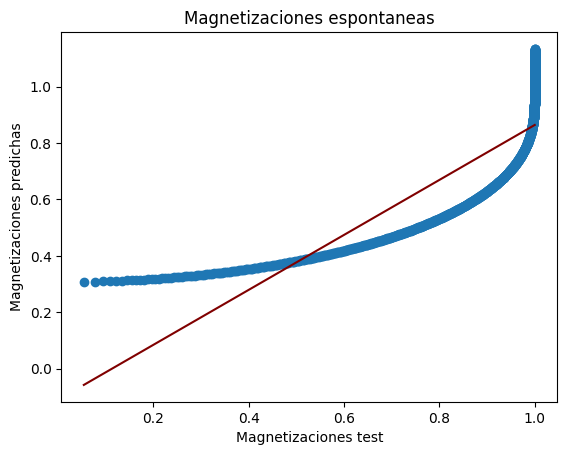

MSE: 0.03389663448711758
RMSE: 0.18411038668993548
R2: 0.20601571469628266


In [67]:
#Veamos primero una regresion lineal con el momento test J=1/2
#Sabemos que la relaciñon entre T/Tc y M/Mc no es lineal por lo que no dará buenos resultados
#Aún así, apliquemos el modelo
m, b, r, p, se = stats.linregress(temp, magn)

print('slope: {}\ny-intercept: {}'.format(m, b))
print('so...\n f(x) = {}x + {}'.format(m, b))

#Hagamos las matrices para los datos test:
X_test = np.array(df_test['T'])
y_test1 = np.array(df_test['J=1/2'])
X_test=X_test.reshape(-1,1)
y_train = magn
model = LinearRegression().fit(X_train, y_train)

#Comparamos las predicciones
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Magnetizaciones predichas: ',np.round(predictions)[:100])
print('Magnetizaciones test: ',y_test1[:100])

plt.scatter(y_test1, predictions)
plt.xlabel('Magnetizaciones test')
plt.ylabel('Magnetizaciones predichas')
plt.title('Magnetizaciones espontaneas')
# overlay the regression line
z = np.polyfit(y_test1, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test1,p(y_test1), color='maroon')
plt.show()

#Veamos las métricas del modelo
mse = mean_squared_error(y_test1, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test1, predictions)
print("R2:", r2)


Lasso() 

MSE: 0.06182344641782626
RMSE: 0.24864321108332368
R2: -0.36371474172127205


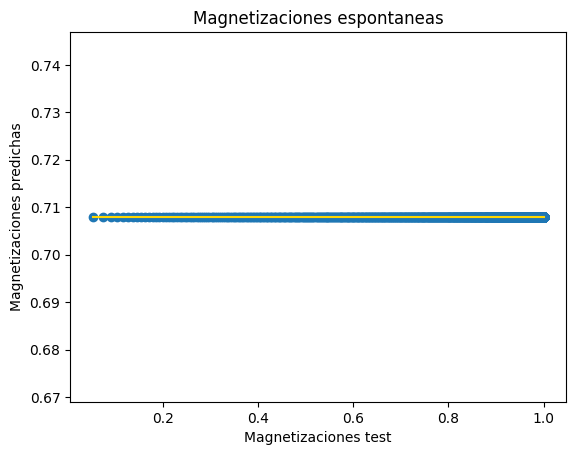

In [84]:
#Veamos otro tipo de regresión lineal para el J=1: modelo Lasso
#Ahora lo intentaremos con Dataframe

from sklearn.linear_model import Lasso
X_test2 = df_test[['T']]
y_test2 = df_test['J=1']

data_train={'T':[0.030717,0.061433, 0.095563, 0.12628, 0.153584, 0.191126, 0.262799, 0.334471,0.416382,0.505119,0.583618,0.761092,0.860068,0.938567,0.969283,0.986348,0.996587,1.006826], 'm':[1, 0.99962, 0.997342, 0.992141, 0.983143, 0.976689, 0.945822, 0.921371,0.884088,0.836554,0.790311,0.651695,0.560614,0.406811,0.329929,0.213372,0.158282,0.095524]}
df_data_train=pd.DataFrame(data_train)
X_train2=df_data_train[['T']]
y_train2=df_data_train['m']

model = Lasso().fit(X_train2, y_train2)
print (model, "\n")

predictions = model.predict(X_test2)
mse = mean_squared_error(y_test2, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test2, predictions)
print("R2:", r2)

#Comparamos las predicciones con los valores test
plt.scatter(y_test2, predictions)
plt.xlabel('Magnetizaciones test')
plt.ylabel('Magnetizaciones predichas')
plt.title('Magnetizaciones espontaneas')
# overlay the regression line
z = np.polyfit(y_test2, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test2,p(y_test2), color='gold')
plt.show()

